In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

In [3]:
df0 = pd.read_csv('sao-paulo-properties-april-2019.csv')
display(df0.head(3))

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


In [4]:
# l = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'District', 'Negotiation Type', 'Property Type']
# dfc = df0

# for i in l:
#     dfc[i] = dfc[i].astype('category')

# for i in l:
#     print(i)
#     display(dfc[i].cat.categories)
    
# df0.dtypes


In [5]:
# for i in l:
#     df0[i] = df0[i].astype('int64')
# df0.dtypes


In [6]:
rent = df0['Negotiation Type'] == 'rent'
# df = df.loc[maior,['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District', 'Negotiation Type', 'Property Type', 'Latitude','Longitude']]
df = df0.loc[rent,['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'District', 'Property Type']]

In [7]:
df['Swimming Pool'] = df['Swimming Pool'].astype('category')
df['District'] = df['District'].astype('category')
df['Property Type'] = df['Property Type'].astype('category')
df['Furnished'] = df['Furnished'].astype('category')
df['Elevator'] = df['Elevator'].astype('category')


In [49]:
df['Swimming Pool'].cat.categories = ['No', 'Yes']
df['Furnished'].cat.categories = ['No', 'Yes']
df['Elevator'].cat.categories = ['No', 'Yes']
display(df.head())
display(df.dtypes)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Property Type
0,930,220,47,2,2,1,1,No,No,No,Artur Alvim/São Paulo,apartment
1,1000,148,45,2,2,1,1,No,No,No,Artur Alvim/São Paulo,apartment
2,1000,100,48,2,2,1,1,No,No,No,Artur Alvim/São Paulo,apartment
3,1000,200,48,2,2,1,1,No,No,No,Artur Alvim/São Paulo,apartment
4,1300,410,55,2,2,1,1,Yes,No,No,Artur Alvim/São Paulo,apartment


Price               int64
Condo               int64
Size                int64
Rooms               int64
Toilets             int64
Suites              int64
Parking             int64
Elevator         category
Furnished        category
Swimming Pool    category
District         category
Property Type    category
dtype: object

In [10]:
df.to_csv('SP_rent_prices.csv')

In [14]:
dados_ordenados_por_preço = df.sort_values(['Price'])
dados_ordenados_por_preço

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Property Type
508,480,295,48,2,2,1,1,No,No,No,São Rafael/São Paulo,apartment
4486,500,380,66,2,1,0,1,No,No,No,Jaraguá/São Paulo,apartment
2878,500,36,45,1,2,1,0,No,No,Yes,Vila Maria/São Paulo,apartment
288,500,0,40,1,2,1,1,No,No,No,Jardim Helena/São Paulo,apartment
122,500,0,50,1,2,1,1,No,No,No,Cidade Líder/São Paulo,apartment
...,...,...,...,...,...,...,...,...,...,...,...,...
10530,40000,4500,442,4,5,4,6,No,No,Yes,Campo Belo/São Paulo,apartment
234,45000,0,443,4,2,1,1,No,No,No,Iguatemi/São Paulo,apartment
3732,50000,6100,349,4,5,4,5,No,No,Yes,Jardim Paulista/São Paulo,apartment
1589,50000,6800,598,4,7,4,6,Yes,No,Yes,Alto de Pinheiros/São Paulo,apartment


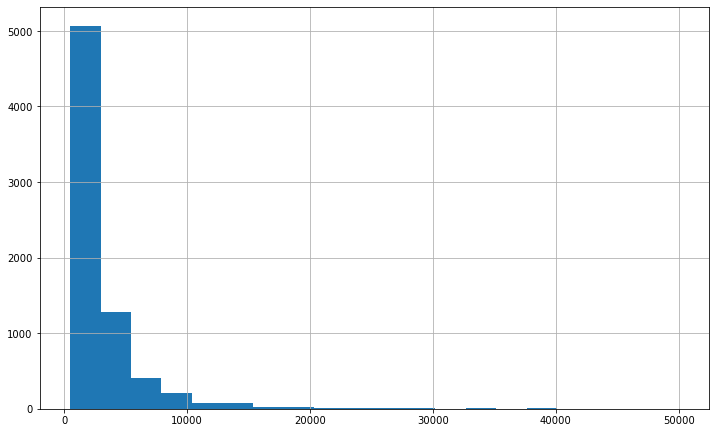

,Price
count,7228.000000
mean,3077.669065
std,3522.830284
min,480.000000
25%,1350.000000
50%,2000.000000
75%,3300.000000
max,50000.000000


In [61]:
figure = plt.figure(figsize=(12, 7.4))
plt.hist(df.Price, bins=20)
plt.grid()
plt.show()
df[['Price']].describe()

In [71]:
SP = pd.crosstab(df['Swimming Pool'], df.Price)
display(SP)

Price,480,500,550,600,610,628,630,650,660,670,...,26000,27000,29000,30000,35000,36000,38000,40000,45000,50000
Swimming Pool,,,,,,,,,,,,,,,,,,,,,
No,1,4,1,7,1,1,2,13,3,1,...,0,0,0,2,0,1,0,2,1,0
Yes,0,1,0,0,0,0,0,0,0,0,...,2,3,1,3,4,1,1,1,0,3
